In [1]:
#pip install pyroomacoustics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import fftconvolve
import IPython
import pyroomacoustics as pra
#%matplotlib notebook

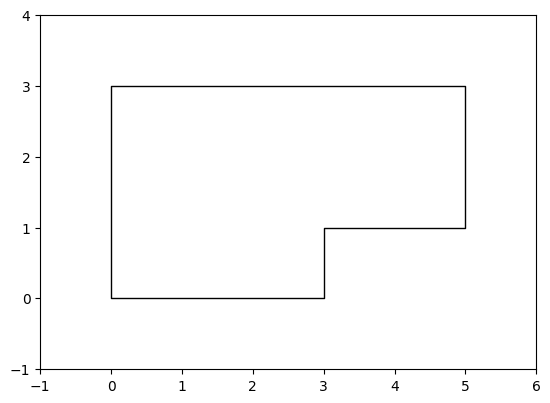

In [3]:
corners = np.array([[0,0], [0,3], [5,3], [5,1], [3,1], [3,0]]).T  # [x,y]
room = pra.Room.from_corners(corners)

fig, ax = room.plot()
ax.set_xlim([-1, 6])
ax.set_ylim([-1, 4]);

In [4]:
# specify signal source
fs, signal = wavfile.read("pyroomacoustics/notebooks/beethoven.wav")

# set max_order to a low value for a quick (but less accurate) RIR
room = pra.Room.from_corners(corners, fs=fs, max_order=3, materials=pra.Material(0.2, 0.15), ray_tracing=True, air_absorption=True)
room.extrude(2., materials=pra.Material(0.2, 0.15))

# Set the ray tracing parameters
room.set_ray_tracing(receiver_radius=0.5, n_rays=10000, energy_thres=1e-5)

# add source and set the signal to WAV file content
room.add_source([0, 1.5, 0.5], signal=signal)

# add two-microphone array
# R = np.array([[3.5, 3.6], [2., 2.], [0.5,  0.5]])  # [[x], [y], [z]]
def SDML7(d=0.1, r=[0, 0, 0]):
    mic_7 = np.array([[d / 2, -d / 2, 0, 0, 0, 0, 0],
                      [0, 0, d / 2, -d / 2, 0, 0, 0],
                      [0, 0, 0, 0, d / 2, -d / 2, 0]])

    # 将 r 转换为数组
    r = np.array(r)

    # 将 r 添加到 mic_7 中的每个元素
    mic_7 = mic_7 + r[:, np.newaxis]

    return mic_7

r=[3.5, 2, 0.5]
mic = SDML7(0.5,r)#第一个SRIR的位置是[0,-20,-3] 第二个SRIR的位置是[0, -8, -3] 中间值是[0, -14, -3]
room.add_microphone(mic)

fig, ax = room.plot()
ax.set_xlim([-1, 6])
ax.set_ylim([-1, 4])
ax.set_zlim([-1, 3])
fig.show()

# compute image sources
room.image_source_model()

# visualize 3D polyhedron room and image sources
fig, ax = room.plot(img_order=3)
fig.set_size_inches(18.5, 10.5)

FileNotFoundError: [Errno 2] No such file or directory: 'pyroomacoustics/notebooks/beethoven.wav'

In [ ]:
room.plot_rir()
fig = plt.gcf()
fig.set_size_inches(20, 10)

In [ ]:
room.simulate()
print(room.mic_array.signals.shape)

In [ ]:
# original signal
print("Original WAV:")
IPython.display.Audio(signal, rate=fs)

In [ ]:
print("Simulated propagation to first mic:")
IPython.display.Audio(room.mic_array.signals[0,:], rate=fs)

In [ ]:
 room.mic_array.signals